In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import tensorflow as tf
from tensorflow import keras

In [ ]:
with open('C:/Users/cjswo/OneDrive/Desktop/Artificial Intelligence/jupyter/data/train.csv') as file:
    df = pd.read_csv(file)
    
df.head(30)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,58.0,close,gyeonggi,168.0,20130000.0,132.0,nursing_hospital,2.680000e+09,1.802000e+08,2.010000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,change
1,107.0,close,jeonbuk,26.0,19990000.0,NaN,traditional_hospital,4.130000e+09,1.436100e+08,3.520000e+09,...,2.650000e+09,2.630000e+09,2.440000e+09,2.557000e+07,NaN,2.480000e+09,NaN,85.0,74.0,same
2,140.0,close,gyeongbuk,114.0,20070000.0,203.0,hospital,5.420000e+09,NaN,5.210000e+09,...,2.730000e+09,1.406200e+08,NaN,2.590000e+09,2.590000e+09,3.750000e+09,NaN,NaN,NaN,NaN
3,164.0,close,jeonbuk,136.0,20050000.0,326.0,nursing_hospital,2.170000e+09,3.122100e+08,1.500000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,320.0,same
4,209.0,close,busan,63.0,19990000.0,151.0,hospital,8.840000e+09,NaN,7.950000e+09,...,1.495000e+10,1.001000e+10,6.250000e+09,4.930000e+09,4.920000e+09,2.500700e+08,NaN,110.0,110.0,same
5,238.0,close,jeonnam,19.0,20150000.0,119.0,hospital,3.580000e+09,5.106400e+08,2.840000e+09,...,5.370000e+09,2.030000e+09,2.986400e+08,3.350000e+09,3.350000e+09,4.220000e+09,NaN,64.0,77.0,change
6,265.0,close,jeonnam,53.0,20050000.0,652.0,nursing_hospital,1.683000e+10,2.370000e+09,1.234000e+10,...,1.430000e+10,1.680000e+09,2.520000e+06,1.262000e+10,7.360000e+09,1.606000e+10,NaN,342.0,278.0,change
7,281.0,close,gyeonggi,12.0,20120000.0,NaN,NaN,3.054400e+08,2.241000e+07,4.674800e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,change
8,306.0,close,jeonnam,33.0,19990000.0,66.0,nursing_hospital,2.233000e+10,8.484700e+08,1.849000e+10,...,1.563000e+10,1.288000e+10,NaN,2.750000e+09,NaN,1.385000e+10,NaN,NaN,NaN,NaN
9,309.0,close,seoul,36.0,20140000.0,NaN,clinic,9.125300e+08,5.824000e+07,1.010000e+09,...,1.030000e+09,3.075500e+08,NaN,7.284500e+08,7.284500e+08,1.670000e+09,NaN,16.0,15.0,change


# 안정성 : 부채비율 = 총부채/자본

|변수|의미 |
|:---|:---|
|inst_id | 각 파일에서의 병원 고유 번호|
|OC| 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함|
|sido| 병원의 광역 지역 정보|
|sgg | 병원의 시군구 자료|
|openDate| 병원 설립일|
|bedCount| 병원이 갖추고 있는 병상의 수|
|instkind | 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
·        종합병원 : 입원환자 100명 이상 수용 가능
·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
·        의원 : 입원 환자 30명 이하 수용 가능
·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.|
|revenue1|매출액, 2017(회계년도)년 데이터를 의미함|
|salescost1|매출원가, 2017(회계년도)년 데이터를 의미함|
|sga1|판매비와 관리비, 2017(회계년도)년 데이터를 의미함|
|salary1|급여, 2017(회계년도)년 데이터를 의미함|
|noi1|영업외수익, 2017(회계년도)년 데이터를 의미함|
|noe1|영업외비용, 2017(회계년도)년 데이터를 의미함|
|Interest1|이자비용, 2017(회계년도)년 데이터를 의미함|
|ctax1|법인세비용, 2017(회계년도)년 데이터를 의미함|
|Profit1|당기순이익, 2017(회계년도)년 데이터를 의미함|
|liquidAsset1|유동자산, 2017(회계년도)년 데이터를 의미함|
|quickAsset1|당좌자산, 2017(회계년도)년 데이터를 의미함|
|receivableS1|미수금(단기), 2017(회계년도)년 데이터를 의미함|
|inventoryAsset1|재고자산, 2017(회계년도)년 데이터를 의미함|
|nonCAsset1|비유동자산, 2017(회계년도)년 데이터를 의미함|
|tanAsset1|유형자산, 2017(회계년도)년 데이터를 의미함|
|OnonCAsset1|기타 비유동자산, 2017(회계년도)년 데이터를 의미함|
|receivableL1|장기미수금, 2017(회계년도)년 데이터를 의미함|
|debt1|부채총계, 2017(회계년도)년 데이터를 의미함|
|liquidLiabilities1|유동부채, 2017(회계년도)년 데이터를 의미함|
|shortLoan1|단기차입금, 2017(회계년도)년 데이터를 의미함|
|NCLiabilities1|비유동부채, 2017(회계년도)년 데이터를 의미함|
longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함|
|netAsset1|순자산총계, 2017(회계년도)년 데이터를 의미함|
|surplus1|이익잉여금, 2017(회계년도)년 데이터를 의미함|
|salescost2|매출원가, 2016(회계년도)년 데이터를 의미함|
|sga2|판매비와 관리비, 2016(회계년도)년 데이터를 의미함|
|salary2|급여, 2016(회계년도)년 데이터를 의미함|
|noi2|영업외수익, 2016(회계년도)년 데이터를 의미함|
|noe2|영업외비용, 2016(회계년도)년 데이터를 의미함|
|interest2|이자비용, 2016(회계년도)년 데이터를 의미함|
|ctax2|법인세비용, 2016(회계년도)년 데이터를 의미함|
|profit2|당기순이익, 2016(회계년도)년 데이터를 의미함|
|liquidAsset2|유동자산, 2016(회계년도)년 데이터를 의미함|
|quickAsset2|당좌자산, 2016(회계년도)년 데이터를 의미함|
|receivableS2|미수금(단기), 2016(회계년도)년 데이터를 의미함|
|inventoryAsset2|재고자산, 2016(회계년도)년 데이터를 의미함|
|nonCAsset2|비유동자산, 2016(회계년도)년 데이터를 의미함|
|tanAsset2|유형자산, 2016(회계년도)년 데이터를 의미함|
|OnonCAsset2|기타 비유동자산, 2016(회계년도)년 데이터를 의미함|
|receivableL2|장기미수금, 2016(회계년도)년 데이터를 의미함|
|Debt2|부채총계, 2016(회계년도)년 데이터를 의미함|
|liquidLiabilities2|유동부채, 2016(회계년도)년 데이터를 의미함|
|shortLoan2|단기차입금, 2016(회계년도)년 데이터를 의미함|
|NCLiabilities2|비유동부채, 2016(회계년도)년 데이터를 의미함|
|longLoan2|장기차입금, 2016(회계년도)년 데이터를 의미함|
|netAsset2|순자산총계, 2016(회계년도)년 데이터를 의미함|
|surplus2|이익잉여금, 2016(회계년도)년 데이터를 의미함|
|employee1|고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함|
|employee2|고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함|
|ownerChange|대표자의 변동|

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    float64
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    float64
 4   openDate            301 non-null    float64
 5   bedCount            274 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            289 non-null    float64
 8   salescost1          201 non-null    float64
 9   sga1                288 non-null    float64
 10  salary1             282 non-null    float64
 11  noi1                285 non-null    float64
 12  noe1                281 non-null    float64
 13  interest1           267 non-null    float64
 14  ctax1               164 non-null    float64
 15  profit1             290 non-null    float64
 16  liquidAs

### open과 close 여부

open      286
 close     15
Name: OC, dtype: int64

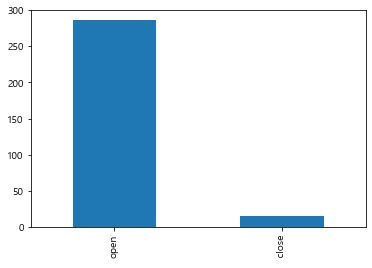

In [ ]:
df['OC'].value_counts().plot(kind='bar')
df['OC'].value_counts()

### 시,도 비율

gyeonggi     49
gyeongbuk    39
gyeongnam    35
busan        26
choongnam    23
jeonnam      21
seoul        19
jeonbuk      18
daegu        14
choongbuk    13
daejeon      13
incheon      10
gangwon      10
ulsan         8
gwangju       2
sejong        1
Name: sido, dtype: int64

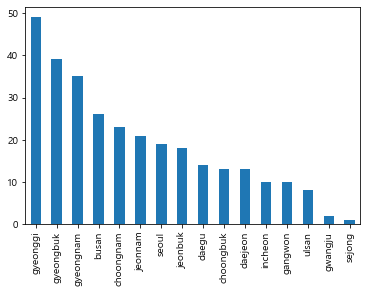

In [ ]:
df['sido'].value_counts().plot(kind='bar')
df['sido'].value_counts()

### 병상 개수 분포

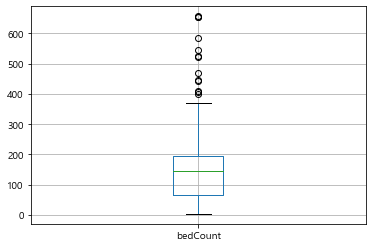

In [ ]:
df.boxplot(column = 'bedCount')

### 병원 종류

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

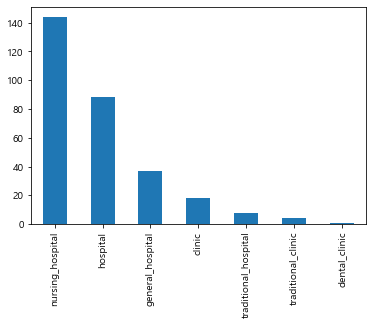

In [ ]:
df['instkind'].value_counts().plot(kind='bar')
df['instkind'].value_counts()

### revenue (매출액)

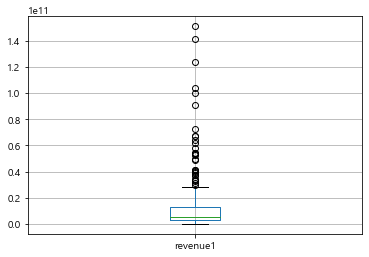

In [ ]:
df.boxplot('revenue1')

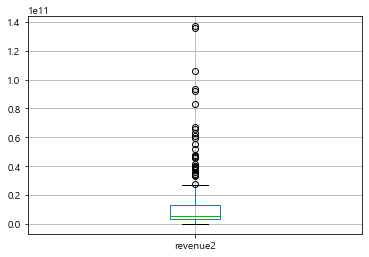

In [ ]:
df.boxplot('revenue2')

### 매출원가

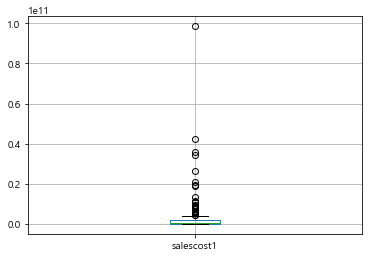

In [ ]:
df.boxplot('salescost1')

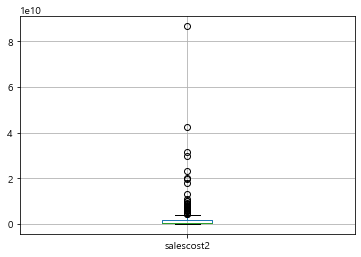

In [ ]:
df.boxplot('salescost2')

### 판매비와 관리비

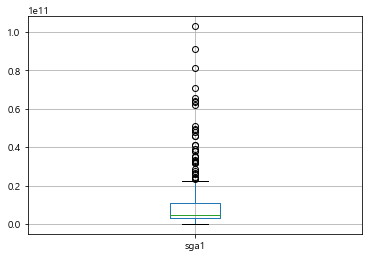

In [ ]:
df.boxplot('sga1')

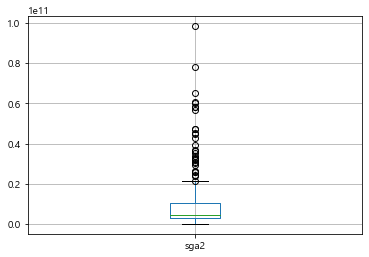

In [ ]:
df.boxplot('sga2')

### 급여

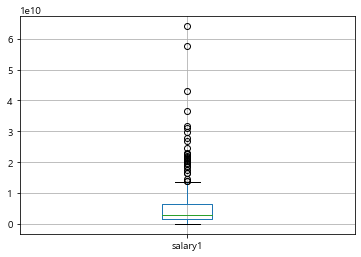

In [ ]:
df.boxplot('salary1')

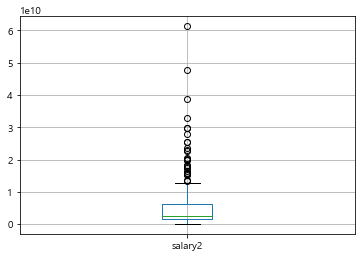

In [ ]:
df.boxplot('salary2')

### 영업외 수익

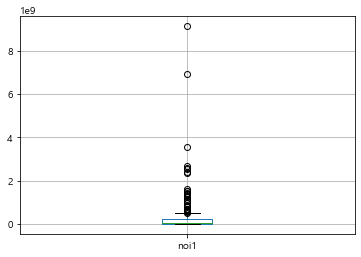

In [ ]:
df.boxplot('noi1')

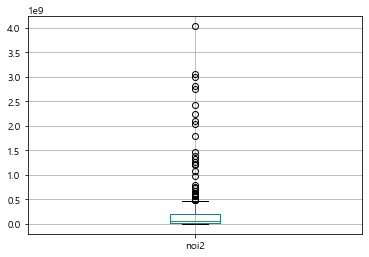

In [ ]:
df.boxplot('noi2')

### 영업외비용

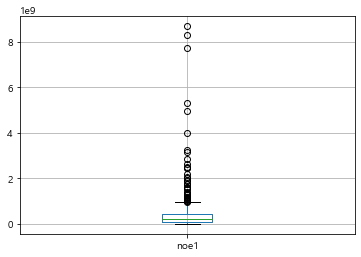

In [ ]:
df.boxplot('noe1')

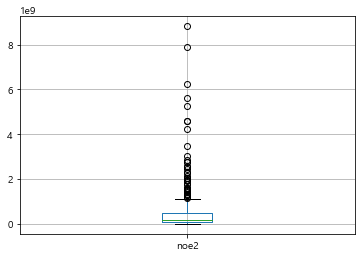

In [ ]:
df.boxplot('noe2')

### 이자비용

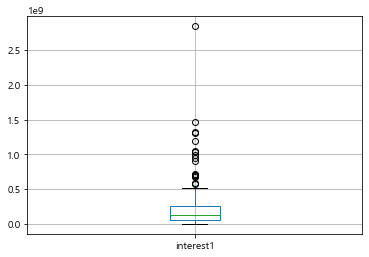

In [ ]:
df.boxplot('interest1')

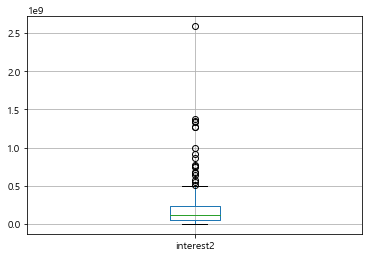

In [ ]:
df.boxplot('interest2')

### 법인세비용

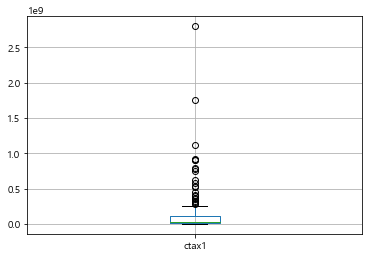

In [ ]:
df.boxplot('ctax1')

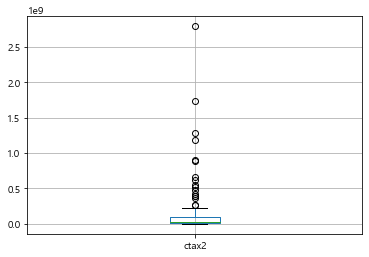

In [ ]:
df.boxplot('ctax2')

### 당기순이익

C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


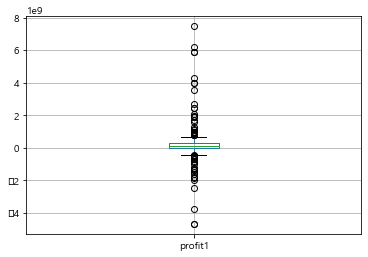

In [ ]:
df.boxplot('profit1')

C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


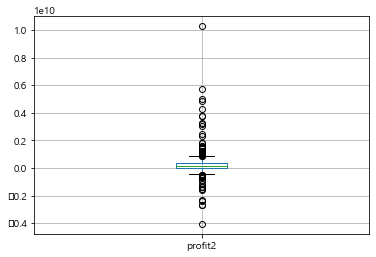

In [ ]:
df.boxplot('profit2')

### 유동자산

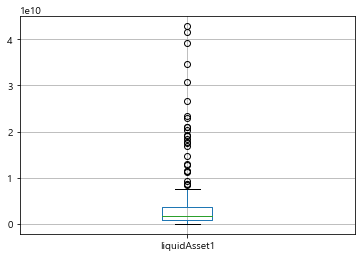

In [ ]:
df.boxplot('liquidAsset1')

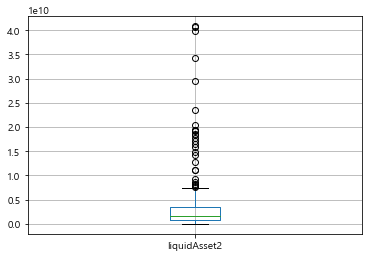

In [ ]:
df.boxplot('liquidAsset2')

### 당좌자산

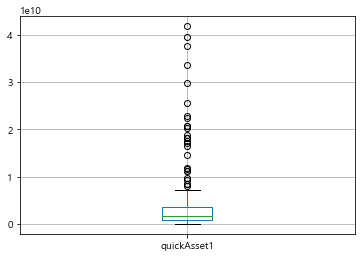

In [ ]:
df.boxplot('quickAsset1')

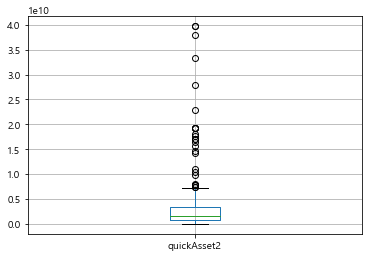

In [ ]:
df.boxplot('quickAsset2')

### 미수금(단기)

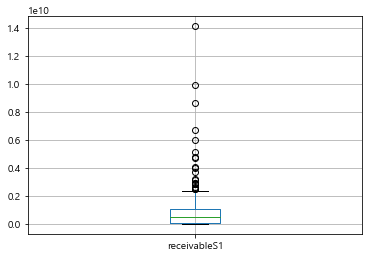

In [ ]:
df.boxplot('receivableS1')

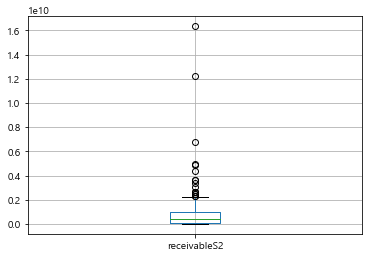

In [ ]:
df.boxplot('receivableS2')

### 재고자산

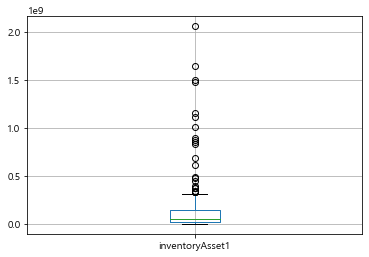

In [ ]:
df.boxplot('inventoryAsset1')

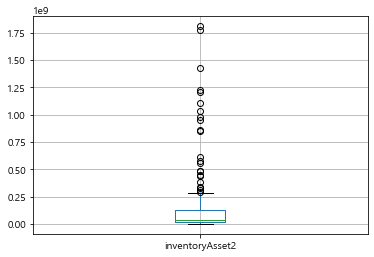

In [ ]:
df.boxplot('inventoryAsset2')

### 비유동자산

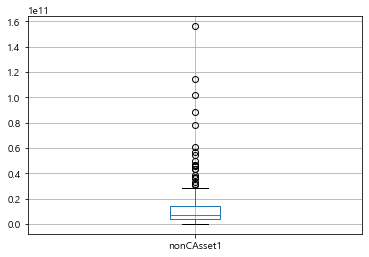

In [ ]:
df.boxplot('nonCAsset1')

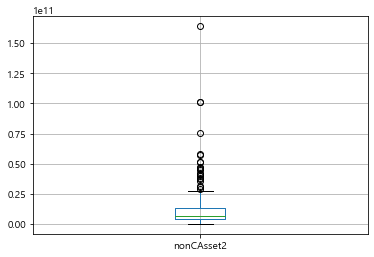

In [ ]:
df.boxplot('nonCAsset2')

### 유형자산

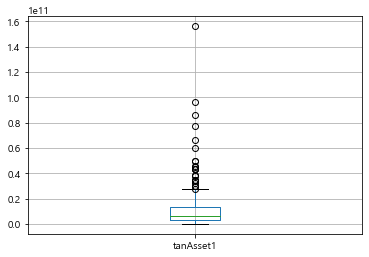

In [ ]:
df.boxplot('tanAsset1')

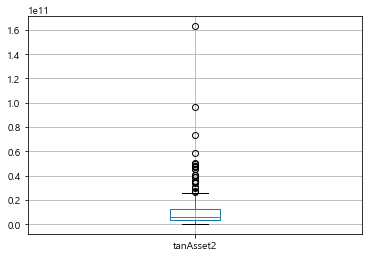

In [ ]:
df.boxplot('tanAsset2')

### 기타 비유동자산

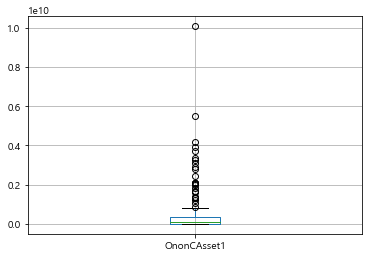

In [ ]:
df.boxplot('OnonCAsset1')

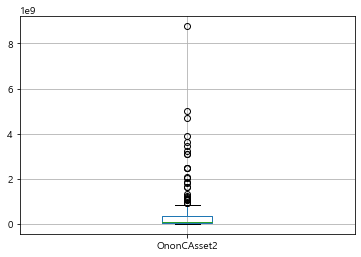

In [ ]:
df.boxplot('OnonCAsset2')

### 장기미수금

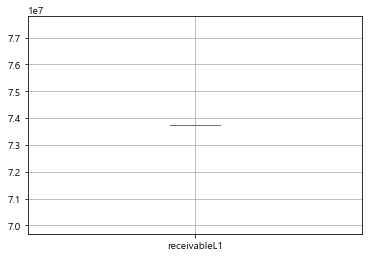

In [ ]:
df.boxplot('receivableL1')

In [ ]:
df['receivableL1'].value_counts()

73740000.0    1
Name: receivableL1, dtype: int64

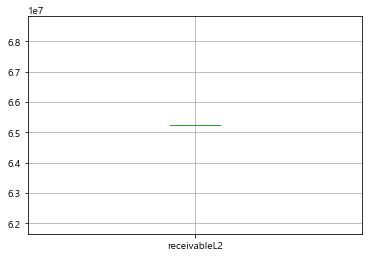

In [ ]:
df.boxplot('receivableL2')

### 부채총계

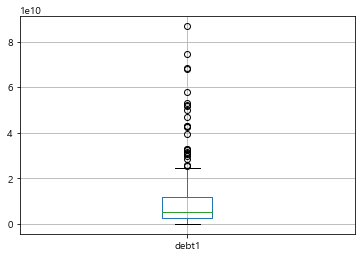

In [ ]:
df.boxplot('debt1')

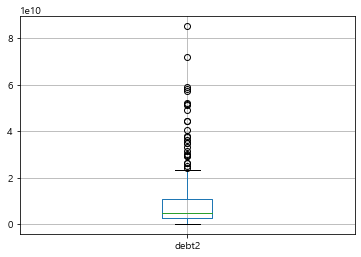

In [ ]:
df.boxplot('debt2')

### 유동부채

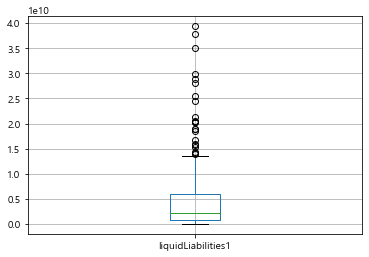

In [ ]:
df.boxplot('liquidLiabilities1')

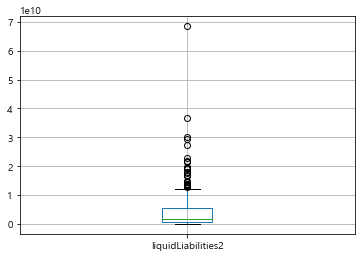

In [ ]:
df.boxplot('liquidLiabilities2')

### 단기차입금

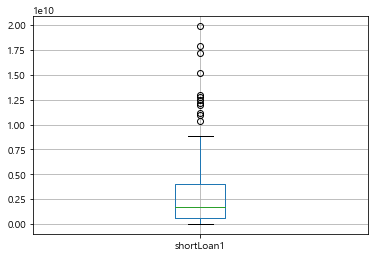

In [ ]:
df.boxplot('shortLoan1')

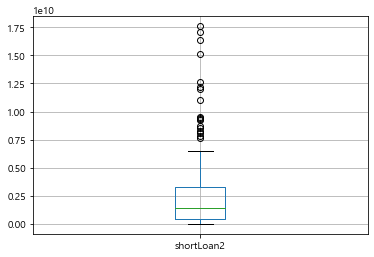

In [ ]:
df.boxplot('shortLoan2')

### 비유동부채

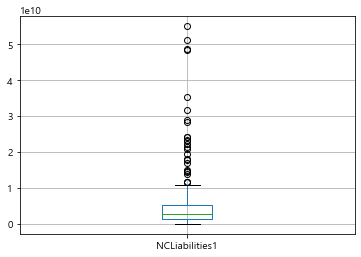

In [ ]:
df.boxplot('NCLiabilities1')

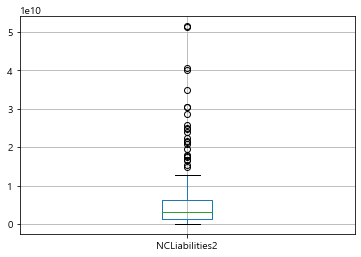

In [ ]:
df.boxplot('NCLiabilities2')

### 장기차입금

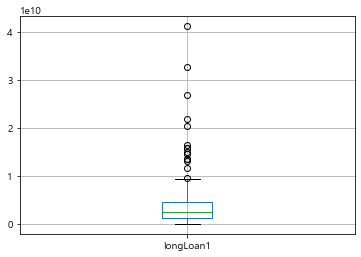

In [ ]:
df.boxplot('longLoan1')

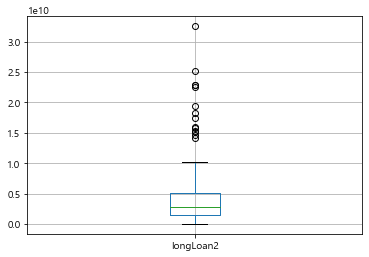

In [ ]:
df.boxplot('longLoan2')

### 순자산총계

C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


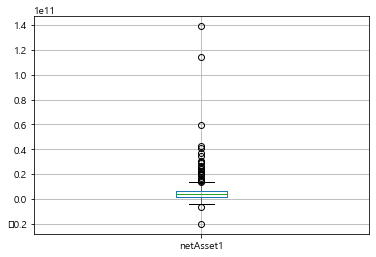

In [ ]:
df.boxplot('netAsset1')

C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


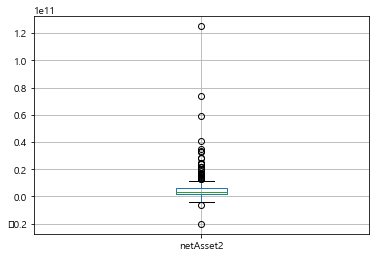

In [ ]:
df.boxplot('netAsset2')

### 이익잉여금

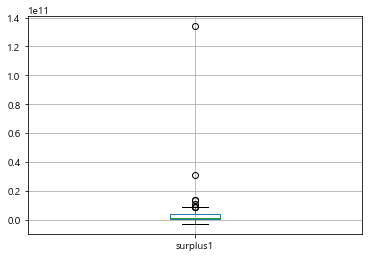

In [ ]:
df.boxplot('surplus1')

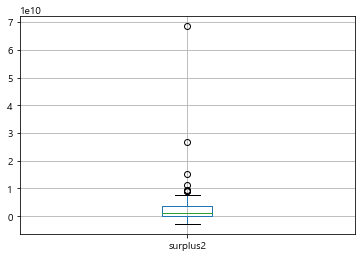

In [ ]:
df.boxplot('surplus2')

### 고용한 총직원의 수

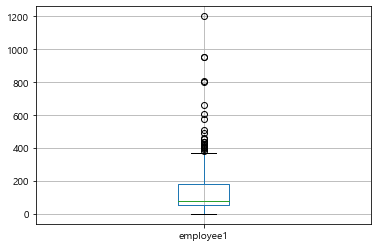

In [ ]:
df.boxplot('employee1')

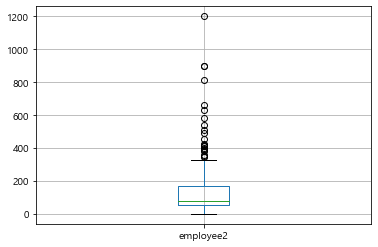

In [ ]:
df.boxplot('employee2')

### 대표자의 변동

same      247
change     42
Name: ownerChange, dtype: int64

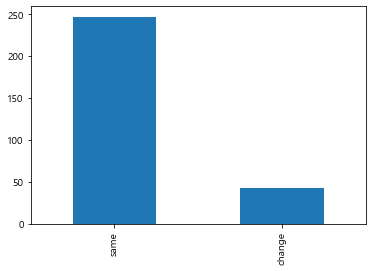

In [ ]:
df['ownerChange'].value_counts().plot(kind = 'bar')
df['ownerChange'].value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    float64
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    float64
 4   openDate            301 non-null    float64
 5   bedCount            274 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            289 non-null    float64
 8   salescost1          201 non-null    float64
 9   sga1                288 non-null    float64
 10  salary1             282 non-null    float64
 11  noi1                285 non-null    float64
 12  noe1                281 non-null    float64
 13  interest1           267 non-null    float64
 14  ctax1               164 non-null    float64
 15  profit1             290 non-null    float64
 16  liquidAs

#### 변수 단독으로서보다 변수사이의 차, 비 등을 이용하여 분석하는것이 의미있을거라 생각

## 결측값 삭제

In [ ]:
df2 = df.dropna(subset = ['noe1','noi1'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             280 non-null    float64
 1   OC                  280 non-null    object 
 2   sido                280 non-null    object 
 3   sgg                 280 non-null    float64
 4   openDate            280 non-null    float64
 5   bedCount            255 non-null    float64
 6   instkind            279 non-null    object 
 7   revenue1            278 non-null    float64
 8   salescost1          193 non-null    float64
 9   sga1                278 non-null    float64
 10  salary1             275 non-null    float64
 11  noi1                280 non-null    float64
 12  noe1                280 non-null    float64
 13  interest1           264 non-null    float64
 14  ctax1               164 non-null    float64
 15  profit1             277 non-null    float64
 16  liquidAs

In [ ]:
df2['OC'].value_counts()

open      265
 close     15
Name: OC, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
x = np.array(df2['OC']).reshape(-1,1)
enc = OneHotEncoder()
enc.fit(x)

OC_onehot = enc.transform(x).toarray()
OC_onehot_recovery = np.argmax(OC_onehot, axis=1).reshape(-1,1)

In [ ]:
df2['OC_onehot'] = OC_onehot_recovery

C:\Users\cjswo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


open      265
 close     15
Name: OC, dtype: int64

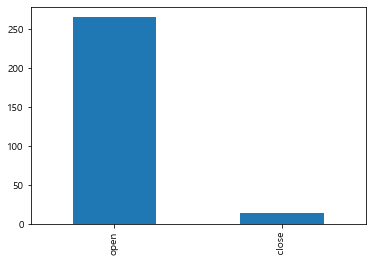

In [ ]:
df2['OC'].value_counts().plot(kind = 'bar')
df2['OC'].value_counts()

In [ ]:
df2

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,OC_onehot
0,58.0,close,gyeonggi,168.0,20130000.0,132.0,nursing_hospital,2.680000e+09,180200000.0,2.010000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,change,0
1,107.0,close,jeonbuk,26.0,19990000.0,NaN,traditional_hospital,4.130000e+09,143610000.0,3.520000e+09,...,2.630000e+09,2.440000e+09,2.557000e+07,NaN,2.480000e+09,NaN,85.0,74.0,same,0
2,140.0,close,gyeongbuk,114.0,20070000.0,203.0,hospital,5.420000e+09,NaN,5.210000e+09,...,1.406200e+08,NaN,2.590000e+09,2.590000e+09,3.750000e+09,NaN,NaN,NaN,NaN,0
3,164.0,close,jeonbuk,136.0,20050000.0,326.0,nursing_hospital,2.170000e+09,312210000.0,1.500000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,322.0,320.0,same,0
4,209.0,close,busan,63.0,19990000.0,151.0,hospital,8.840000e+09,NaN,7.950000e+09,...,1.001000e+10,6.250000e+09,4.930000e+09,4.920000e+09,2.500700e+08,NaN,110.0,110.0,same,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,418.0,open,gyeonggi,170.0,20120000.0,109.0,hospital,4.300000e+09,242390000.0,3.450000e+09,...,3.090000e+09,NaN,1.960000e+09,1.920000e+09,2.630000e+09,NaN,75.0,70.0,same,1
297,419.0,open,gyeongnam,174.0,20100000.0,367.0,nursing_hospital,1.208000e+10,530920000.0,9.520000e+09,...,1.100000e+09,2.813200e+08,6.090000e+09,5.890000e+09,9.060000e+09,NaN,180.0,180.0,same,1
298,420.0,open,gyeonggi,177.0,20110000.0,NaN,nursing_hospital,5.500000e+09,NaN,4.880000e+09,...,7.114000e+08,NaN,3.230000e+09,1.800000e+09,4.330000e+09,NaN,62.0,66.0,same,1
299,422.0,open,jeonnam,178.0,20050000.0,214.0,nursing_hospital,7.610000e+09,415350000.0,5.900000e+09,...,2.610000e+09,NaN,6.800000e+09,5.930000e+09,5.370000e+09,8.116400e+08,193.0,141.0,same,1


In [ ]:
d_OC = df2.groupby('OC').mean()
d_OC

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,OC_onehot
OC,,,,,,,,,,,,,,,,,,,,,
close,275.533333,90.800000,2.006867e+07,225.444444,6.110569e+09,1.216222e+09,4.836591e+09,3.015136e+09,1.741302e+08,3.495940e+08,...,7.074359e+09,4.249797e+09,2.247790e+09,3.898002e+09,3.573075e+09,5.691259e+09,NaN,114.750000,115.20000,0
open,215.211321,81.086792,2.004958e+07,151.520325,1.379726e+10,3.155551e+09,1.108207e+10,6.108471e+09,2.876255e+08,5.452861e+08,...,9.938087e+09,4.612557e+09,2.750599e+09,5.857391e+09,4.438745e+09,6.451697e+09,3.400393e+09,138.181467,130.75969,1


In [ ]:
pd.set_option('display.max_columns', None)
d_OC = df2.groupby('OC').mean()
d_rate = d_OC.iloc[0]/d_OC.iloc[1]
d_rate

inst_id               1.280292
sgg                   1.119788
openDate              1.000952
bedCount              1.487883
revenue1              0.442883
salescost1            0.385423
sga1                  0.436434
salary1               0.493599
noi1                  0.605406
noe1                  0.641120
interest1             1.016173
ctax1                 0.619152
profit1               0.019023
liquidAsset1          0.976769
quickAsset1           0.997261
receivableS1          1.402245
inventoryAsset1       0.405525
nonCAsset1            0.862103
tanAsset1             0.826642
OnonCAsset1           0.369107
receivableL1               NaN
debt1                 0.689100
liquidLiabilities1    0.823313
shortLoan1            0.346216
NCLiabilities1        0.697939
longLoan1             0.977022
netAsset1             1.056918
surplus1              1.816468
revenue2              0.453810
salescost2            0.260583
sga2                  0.489350
salary2               0.521815
noi2    

C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


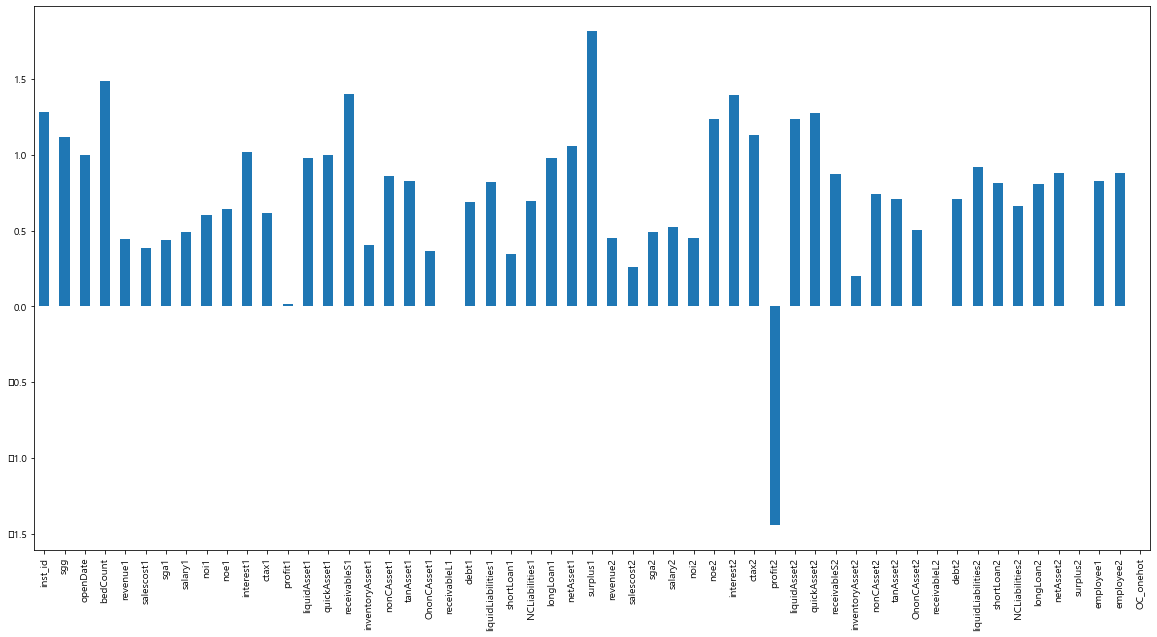

In [ ]:
d_rate.plot(kind = 'bar',figsize=(20,10))

### profit1,2 매우 큰차이// 자산의 변화율,부채와 자본의 비율 등등 변수간의 관계 이용해서 새로운 변수 만들어야함

|변수|의미 |
|:---|:---|
|inst_id | 각 파일에서의 병원 고유 번호|
|OC| 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함|
|sido| 병원의 광역 지역 정보|
|sgg | 병원의 시군구 자료|
|openDate| 병원 설립일|
|bedCount| 병원이 갖추고 있는 병상의 수|
|instkind | 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
·        종합병원 : 입원환자 100명 이상 수용 가능
·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
·        의원 : 입원 환자 30명 이하 수용 가능
·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.|
|revenue1|매출액, 2017(회계년도)년 데이터를 의미함|
|salescost1|매출원가, 2017(회계년도)년 데이터를 의미함|
|sga1|판매비와 관리비, 2017(회계년도)년 데이터를 의미함|
|salary1|급여, 2017(회계년도)년 데이터를 의미함|
|noi1|영업외수익, 2017(회계년도)년 데이터를 의미함|
|noe1|영업외비용, 2017(회계년도)년 데이터를 의미함|
|Interest1|이자비용, 2017(회계년도)년 데이터를 의미함|
|ctax1|법인세비용, 2017(회계년도)년 데이터를 의미함|
|Profit1|당기순이익, 2017(회계년도)년 데이터를 의미함|
|liquidAsset1|유동자산, 2017(회계년도)년 데이터를 의미함|
|quickAsset1|당좌자산, 2017(회계년도)년 데이터를 의미함|
|receivableS1|미수금(단기), 2017(회계년도)년 데이터를 의미함|
|inventoryAsset1|재고자산, 2017(회계년도)년 데이터를 의미함|
|nonCAsset1|비유동자산, 2017(회계년도)년 데이터를 의미함|
|tanAsset1|유형자산, 2017(회계년도)년 데이터를 의미함|
|OnonCAsset1|기타 비유동자산, 2017(회계년도)년 데이터를 의미함|
|receivableL1|장기미수금, 2017(회계년도)년 데이터를 의미함|
|debt1|부채총계, 2017(회계년도)년 데이터를 의미함|
|liquidLiabilities1|유동부채, 2017(회계년도)년 데이터를 의미함|
|shortLoan1|단기차입금, 2017(회계년도)년 데이터를 의미함|
|NCLiabilities1|비유동부채, 2017(회계년도)년 데이터를 의미함|
longLoan1|장기차입금, 2017(회계년도)년 데이터를 의미함|
|netAsset1|순자산총계, 2017(회계년도)년 데이터를 의미함|
|surplus1|이익잉여금, 2017(회계년도)년 데이터를 의미함|
|salescost2|매출원가, 2016(회계년도)년 데이터를 의미함|
|sga2|판매비와 관리비, 2016(회계년도)년 데이터를 의미함|
|salary2|급여, 2016(회계년도)년 데이터를 의미함|
|noi2|영업외수익, 2016(회계년도)년 데이터를 의미함|
|noe2|영업외비용, 2016(회계년도)년 데이터를 의미함|
|interest2|이자비용, 2016(회계년도)년 데이터를 의미함|
|ctax2|법인세비용, 2016(회계년도)년 데이터를 의미함|
|profit2|당기순이익, 2016(회계년도)년 데이터를 의미함|
|liquidAsset2|유동자산, 2016(회계년도)년 데이터를 의미함|
|quickAsset2|당좌자산, 2016(회계년도)년 데이터를 의미함|
|receivableS2|미수금(단기), 2016(회계년도)년 데이터를 의미함|
|inventoryAsset2|재고자산, 2016(회계년도)년 데이터를 의미함|
|nonCAsset2|비유동자산, 2016(회계년도)년 데이터를 의미함|
|tanAsset2|유형자산, 2016(회계년도)년 데이터를 의미함|
|OnonCAsset2|기타 비유동자산, 2016(회계년도)년 데이터를 의미함|
|receivableL2|장기미수금, 2016(회계년도)년 데이터를 의미함|
|Debt2|부채총계, 2016(회계년도)년 데이터를 의미함|
|liquidLiabilities2|유동부채, 2016(회계년도)년 데이터를 의미함|
|shortLoan2|단기차입금, 2016(회계년도)년 데이터를 의미함|
|NCLiabilities2|비유동부채, 2016(회계년도)년 데이터를 의미함|
|longLoan2|장기차입금, 2016(회계년도)년 데이터를 의미함|
|netAsset2|순자산총계, 2016(회계년도)년 데이터를 의미함|
|surplus2|이익잉여금, 2016(회계년도)년 데이터를 의미함|
|employee1|고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함|
|employee2|고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함|
|ownerChange|대표자의 변동|

## 유동성
    유동비율 = 유동자산/유동부채, 당좌비율 = (유동자산-재고자산)/유동부채

## 안정성
    부채비율 = 총부채/자본

In [ ]:
df2['유동비율_2017'] = df2['liquidAsset1']/(df2['liquidLiabilities1']+1)
df2['당좌비율_2017'] = (df2['liquidAsset1']-df2['inventoryAsset1'])/(df2['liquidLiabilities1']+1)
df2['유동비율_2016'] = df2['liquidAsset1']/(df2['liquidLiabilities1']+1)
df2['당좌비율_2016'] = (df2['liquidAsset1']-df2['inventoryAsset1'])/(df2['liquidLiabilities1']+1)
df2['이익차이'] = df2['profit1']/(df2['profit2'])
df2['부채차이'] = df2['debt1']/df2['debt2']
df2['매출차이'] = df2['revenue1']/df2['revenue2']

C:\Users\cjswo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cjswo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cjswo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
df3 = df2[['OC_onehot','유동비율_2017','이익차이','부채차이','매출차이','profit1','profit2','debt1','debt2','revenue1','revenue2','shortLoan1']]
df3.corr()

,OC_onehot,유동비율_2017,이익차이,부채차이,매출차이,profit1,profit2,debt1,debt2,revenue1,revenue2,shortLoan1
OC_onehot,1.000000,0.050071,0.010030,0.075752,0.015690,0.040938,0.133278,0.047815,0.041087,0.080837,0.077174,0.101120
유동비율_2017,0.050071,1.000000,-0.010953,-0.022566,-0.006867,0.108285,0.102597,-0.118423,-0.104961,-0.046395,-0.053462,-0.280482
이익차이,0.010030,-0.010953,1.000000,0.462726,0.317352,-0.051856,-0.008659,-0.001178,-0.018925,-0.023322,0.021757,-0.061355
부채차이,0.075752,-0.022566,0.462726,1.000000,-0.069398,-0.079799,-0.018734,0.009321,-0.113364,-0.070809,-0.054552,-0.048738
매출차이,0.015690,-0.006867,0.317352,-0.069398,1.000000,0.021385,-0.014188,-0.028349,0.000758,-0.028157,-0.043438,-0.091497
profit1,0.040938,0.108285,-0.051856,-0.079799,0.021385,1.000000,0.668959,0.164909,0.162877,0.207613,0.167086,-0.059432
profit2,0.133278,0.102597,-0.008659,-0.018734,-0.014188,0.668959,1.000000,0.176814,0.265339,0.368664,0.352134,0.101744
debt1,0.047815,-0.118423,-0.001178,0.009321,-0.028349,0.164909,0.176814,1.000000,0.962809,0.806771,0.807337,0.696289
debt2,0.041087,-0.104961,-0.018925,-0.113364,0.000758,0.162877,0.265339,0.962809,1.000000,0.816436,0.814986,0.691120
revenue1,0.080837,-0.046395,-0.023322,-0.070809,-0.028157,0.207613,0.368664,0.806771,0.816436,1.000000,0.996051,0.543546


In [ ]:
df3.head(20)

,OC_onehot,유동비율_2017,이익차이,부채차이,매출차이,profit1,profit2,debt1,debt2,revenue1,revenue2,shortLoan1
0,0,NaN,1.607371,NaN,1.282297,1.181900e+08,7.353000e+07,NaN,NaN,2.680000e+09,2.090000e+09,NaN
1,0,0.706093,3.679933,1.056604,1.247734,2.653600e+08,7.211000e+07,2.800000e+09,2.650000e+09,4.130000e+09,3.310000e+09,2.590000e+09
2,0,1.532258,-9.252199,1.630037,1.069034,9.465000e+07,-1.023000e+07,4.450000e+09,2.730000e+09,5.420000e+09,5.070000e+09,1.750000e+09
3,0,0.608621,NaN,NaN,NaN,1.844000e+08,NaN,1.249000e+10,NaN,2.170000e+09,NaN,1.300000e+09
4,0,0.912088,-0.582707,0.444816,1.002268,1.550000e+09,-2.660000e+09,6.650000e+09,1.495000e+10,8.840000e+09,8.820000e+09,5.500000e+08
5,0,0.327284,1.194064,0.953445,1.297101,5.230000e+06,4.380000e+06,5.120000e+09,5.370000e+09,3.580000e+09,2.760000e+09,2.295700e+08
6,0,1.914634,5.628680,0.642657,1.199572,1.950000e+09,3.464400e+08,9.190000e+09,1.430000e+10,1.683000e+10,1.403000e+10,2.000000e+07
7,0,NaN,0.616251,NaN,0.571664,-2.611300e+08,-4.237400e+08,NaN,NaN,3.054400e+08,5.343000e+08,NaN
8,0,1.422240,0.918478,1.012156,0.997320,1.690000e+09,1.840000e+09,1.582000e+10,1.563000e+10,2.233000e+10,2.239000e+10,NaN
9,0,0.358326,2.401144,0.970874,0.968161,-1.804700e+08,-7.516000e+07,1.000000e+09,1.030000e+09,9.125300e+08,9.425400e+08,NaN


In [ ]:
df3.tail(10)

,OC_onehot,유동비율_2017,이익차이,부채차이,매출차이,profit1,profit2,debt1,debt2,revenue1,revenue2,shortLoan1
291,1,NaN,1.249452,NaN,1.045845,3.020800e+08,2.417700e+08,NaN,NaN,3.650000e+09,3.490000e+09,NaN
292,1,NaN,0.027918,NaN,0.800152,9.352600e+05,3.350000e+07,NaN,NaN,6.639500e+08,8.297800e+08,NaN
293,1,1.342105,-4.443963,0.928058,0.902113,-1.230000e+09,2.767800e+08,6.450000e+09,6.950000e+09,8.110000e+09,8.990000e+09,NaN
294,1,0.304747,0.360022,0.828261,1.227506,-5.004300e+08,-1.390000e+09,1.143000e+10,1.380000e+10,1.910000e+10,1.556000e+10,NaN
295,1,2.390016,1.549793,1.381107,1.084599,7.470000e+09,4.820000e+09,6.784000e+10,4.912000e+10,1.000000e+11,9.220000e+10,NaN
296,1,0.155483,1.638036,0.976285,1.099744,3.409900e+08,2.081700e+08,4.940000e+09,5.060000e+09,4.300000e+09,3.910000e+09,NaN
297,1,0.494220,0.464864,1.125174,1.112339,4.788100e+08,1.030000e+09,8.090000e+09,7.190000e+09,1.208000e+10,1.086000e+10,NaN
298,1,3.936268,0.996148,1.134518,0.990991,2.456900e+08,2.466400e+08,4.470000e+09,3.940000e+09,5.500000e+09,5.550000e+09,NaN
299,1,1.822368,-2.265033,0.924628,1.077904,5.943900e+08,-2.624200e+08,8.710000e+09,9.420000e+09,7.610000e+09,7.060000e+09,NaN
300,1,0.208308,-0.898322,1.013109,0.899329,-4.550000e+07,5.065000e+07,5.410000e+09,5.340000e+09,1.340000e+09,1.490000e+09,NaN


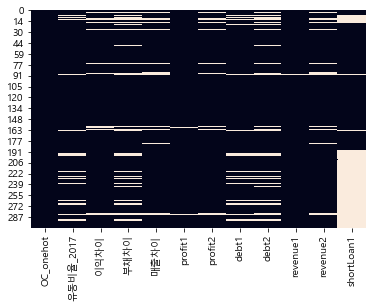

In [ ]:
import seaborn as sns
sns.heatmap(df3.isnull(), cbar = False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.inspection import permutation_importance  # sklearn 22 버전부터 해당

y = (df2['OC_onehot'])  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]
X = df2.drop(['OC','OC_onehot','inst_id','sido','instkind','ownerChange'], axis='columns', inplace=False).fillna(df2.median())
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)


import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
# eli5.show_weights(perm, feature_names = val_X.columns.tolist()) # Notebook에서 실행 가능

print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = val_X.columns.tolist())))

C:\Users\cjswo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\cjswo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

     0 ± 0.0000  salescost1
     0 ± 0.0000  surplus1
     0 ± 0.0000  netAsset1
     0 ± 0.0000  longLoan1
     0 ± 0.0000  NCLiabilities1
     0 ± 0.0000  shortLoan1
     0 ± 0.0000  liquidLiabilities1
     0 ± 0.0000  debt1
     0 ± 0.0000  receivableL1
     0 ± 0.0000  OnonCAsset1
     0 ± 0.0000  tanAsset1
     0 ± 0.0000  nonCAsset1
     0 ± 0.0000  salescost2
     0 ± 0.0000  openDate
     0 ± 0.0000  quickAsset1
     0 ± 0.0000  sga1
     0 ± 0.0000  revenue1
     0 ± 0.0000  inventoryAsset1
     0 ± 0.0000  revenue2
     0 ± 0.0000  매출차이
            … 40 more …            


In [ ]:
from sklearn.manifold import TSNE
X = np.array(df3.fillna(df3.median()))
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape


(280, 2)

C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cjswo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


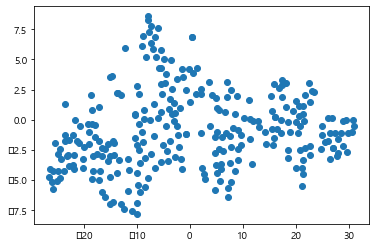

In [ ]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(np.array(df3.fillna(df3.median()).drop('OC_onehot',axis=1)))
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)

plt.show()

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
df3.info()
df4 = df3[['유동비율_2017','이익차이','debt1','revenue1','OC_onehot','profit1']].fillna(df3.median())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 300
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OC_onehot   280 non-null    int64  
 1   유동비율_2017   257 non-null    float64
 2   이익차이        263 non-null    float64
 3   부채차이        239 non-null    float64
 4   매출차이        261 non-null    float64
 5   profit1     277 non-null    float64
 6   profit2     264 non-null    float64
 7   debt1       254 non-null    float64
 8   debt2       239 non-null    float64
 9   revenue1    278 non-null    float64
 10  revenue2    262 non-null    float64
 11  shortLoan1  168 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 38.4 KB


In [ ]:
df4

,유동비율_2017,이익차이,debt1,revenue1,OC_onehot,profit1
0,0.780947,1.607371,5.305000e+09,2.680000e+09,0,1.181900e+08
1,0.706093,3.679933,2.800000e+09,4.130000e+09,0,2.653600e+08
2,1.532258,-9.252199,4.450000e+09,5.420000e+09,0,9.465000e+07
3,0.608621,0.754347,1.249000e+10,2.170000e+09,0,1.844000e+08
4,0.912088,-0.582707,6.650000e+09,8.840000e+09,0,1.550000e+09
...,...,...,...,...,...,...
296,0.155483,1.638036,4.940000e+09,4.300000e+09,1,3.409900e+08
297,0.494220,0.464864,8.090000e+09,1.208000e+10,1,4.788100e+08
298,3.936268,0.996148,4.470000e+09,5.500000e+09,1,2.456900e+08
299,1.822368,-2.265033,8.710000e+09,7.610000e+09,1,5.943900e+08


In [ ]:
X = np.array(df4[['debt1','revenue1','profit1']])
y_train = np.array(df4['OC_onehot'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X)

In [ ]:
X_train.shape

(280, 3)

In [ ]:
y_train.shape

(280,)

In [ ]:
with open('C:/Users/cjswo/OneDrive/Desktop/Artificial Intelligence/jupyter/data/test.csv') as file:
    df_test = pd.read_csv(file)
    
df_test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2.0,NaN,incheon,139.0,19980000.0,300.0,general_hospital,6.682000e+10,NaN,6.565000e+10,3.223000e+10,4.310000e+09,4.900000e+09,1.770000e+09,76680000.0,5.036700e+08,2.591000e+10,2.438000e+10,7.242600e+08,1.520000e+09,4.807000e+10,4.629000e+10,7.463100e+08,NaN,6.769000e+10,5.426000e+10,3.805000e+10,1.343000e+10,6.310000e+09,6.290000e+09,8.940000e+09,6.360000e+10,NaN,6.261000e+10,3.016000e+10,4.070000e+09,4.330000e+09,1.570000e+09,218400000.0,5.181800e+08,2.499000e+10,2.367000e+10,1.230000e+09,1.310000e+09,4.650000e+10,4.356000e+10,796390000.0,NaN,5.540000e+10,5.068000e+10,3.714000e+10,4.720000e+09,4.690000e+09,1.608000e+10,8.940000e+09,693.0,693.0,same
1,5.0,NaN,jeju,149.0,20160000.0,44.0,hospital,3.495000e+10,NaN,3.259000e+10,1.672000e+10,6.871000e+07,1.980000e+09,1.930000e+09,NaN,4.525600e+08,5.860000e+09,5.370000e+09,6.610300e+08,4.895300e+08,7.511000e+10,6.678000e+10,4.500000e+06,NaN,6.626000e+10,4.210000e+10,2.330000e+10,2.415000e+10,1.720000e+10,1.470000e+10,1.046000e+10,3.754000e+10,NaN,3.868000e+10,1.897000e+10,1.918000e+08,3.690000e+09,2.010000e+09,NaN,-4.640000e+09,5.500000e+09,4.940000e+09,1.544300e+08,5.603500e+08,6.559000e+10,6.545000e+10,14500000.0,NaN,6.730000e+10,4.209000e+10,2.420000e+10,2.521000e+10,1.830000e+10,3.780000e+09,NaN,379.0,371.0,same
2,6.0,NaN,jeonnam,103.0,19890000.0,276.0,general_hospital,2.326000e+10,2.540000e+09,2.308000e+10,1.168000e+10,1.600000e+09,1.380000e+09,8.101200e+08,NaN,-2.140000e+09,1.265000e+10,1.133000e+10,7.330000e+09,1.310000e+09,2.945000e+10,2.830000e+10,1.388100e+08,NaN,NaN,2.830000e+10,2.182000e+10,NaN,NaN,NaN,1.638000e+10,2.468000e+10,1.500000e+09,2.373000e+10,1.191000e+10,2.361200e+08,1.320000e+09,6.259200e+08,15210000.0,-1.660000e+09,1.354000e+10,1.263000e+10,7.000000e+09,9.035000e+08,2.938000e+10,2.777000e+10,428850000.0,NaN,NaN,2.777000e+10,2.182000e+10,NaN,NaN,NaN,1.638000e+10,NaN,NaN,NaN
3,8.0,NaN,busan,71.0,20100000.0,363.0,general_hospital,NaN,NaN,NaN,NaN,4.850000e+09,2.060000e+09,NaN,NaN,2.780000e+09,8.640000e+09,7.890000e+09,NaN,7.531900e+08,6.730000e+10,6.415000e+10,NaN,NaN,2.891000e+10,2.604000e+10,1.875000e+10,2.870000e+09,NaN,4.702000e+10,NaN,NaN,NaN,NaN,NaN,4.970000e+09,2.110000e+09,NaN,NaN,2.860000e+09,1.204000e+10,1.126000e+10,NaN,7.841600e+08,3.920000e+10,3.601000e+10,NaN,NaN,1.211000e+10,9.550000e+09,4.250000e+09,2.550000e+09,NaN,3.914000e+10,NaN,760.0,760.0,same
4,10.0,NaN,jeonbuk,26.0,20040000.0,213.0,general_hospital,5.037000e+10,NaN,4.855000e+10,2.296000e+10,1.530000e+09,NaN,2.570000e+09,NaN,3.340000e+09,7.840000e+09,7.130000e+09,1.104000e+08,7.114500e+08,6.404000e+10,6.024000e+10,3.580000e+09,NaN,4.921000e+10,2.503000e+10,1.720000e+10,2.418000e+10,9.970000e+09,2.268000e+10,1.492000e+10,4.349000e+10,NaN,4.067000e+10,1.871000e+10,1.800000e+09,NaN,3.920000e+09,NaN,4.610000e+09,8.840000e+09,7.860000e+09,1.764000e+08,9.789400e+08,6.085000e+10,6.014000e+10,546750000.0,NaN,4.396000e+10,7.530000e+09,3.290000e+09,3.642000e+10,2.134000e+10,2.574000e+10,1.507000e+10,437.0,385.0,same


In [ ]:
tdf2 = df_test.fillna(df_test.median())

In [ ]:
tdf2['유동비율_2017'] = tdf2['liquidAsset1']/(tdf2['liquidLiabilities1']+1)
tdf2['당좌비율_2017'] = (tdf2['liquidAsset1']-tdf2['inventoryAsset1'])/(tdf2['liquidLiabilities1']+1)
tdf2['유동비율_2016'] = tdf2['liquidAsset1']/(tdf2['liquidLiabilities1']+1)
tdf2['당좌비율_2016'] = (tdf2['liquidAsset1']-tdf2['inventoryAsset1'])/(tdf2['liquidLiabilities1']+1)
tdf2['이익차이'] = tdf2['profit1']/(tdf2['profit2']+1)
tdf2['부채차이'] = tdf2['debt1']/(tdf2['debt2'])
tdf2['매출차이'] = tdf2['revenue1']/tdf2['revenue2']

In [ ]:
t = np.array(tdf2[['debt1','revenue1','profit1']].fillna(df3.median()))

In [ ]:
scaler.fit(t)
X_test = scaler.transform(t)

In [ ]:
X_test

array([[ 2.74064076,  1.5726181 ,  0.06362318],
       [ 2.66797462,  0.54357837,  0.0350746 ],
       [-0.40407512,  0.16612388, -1.41305551],
       [ 0.77001651, -0.3637331 ,  1.33511623],
       [ 1.80157072,  1.04146957,  1.64791626],
       [ 1.58103154,  0.82965593,  1.22898764],
       [ 1.71569256,  2.19901819,  0.4246447 ],
       [ 0.54490394,  0.56811775,  0.40788755],
       [ 0.24204369, -0.49740817,  0.1804149 ],
       [ 2.19945591,  1.6862742 ,  0.53077328],
       [ 2.19945591,  1.6862742 ,  0.53077328],
       [ 0.05148564, -0.29334381, -0.70122876],
       [ 4.14416427,  5.25933779,  0.44140184],
       [-0.40407512, -0.37083661, -1.61414125],
       [ 1.89862828,  4.90416249,  4.55807373],
       [-0.40407512, -0.3637331 , -0.13594882],
       [-0.24832568, -0.41184321, -0.33385629],
       [ 0.03725731, -0.03471161, -0.17679157],
       [ 0.47376227, -0.02405635,  0.12310546],
       [ 1.50175939,  3.09599728,  3.00524498],
       [-0.23308104, -0.1486906 , -0.127

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## RF model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40, oob_score=True, random_state=12)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=True, random_state=12, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)

predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
with open('C:/Users/cjswo/OneDrive/Desktop/Artificial Intelligence/jupyter/data/submission_sample.csv') as file:
    sub = pd.read_csv(file)
    
sub['OC'] = predicted

In [ ]:
sub.to_csv('C:/Users/cjswo/OneDrive/Desktop/Artificial Intelligence/jupyter/data/subs/subH.csv', index= False)